<a href="https://colab.research.google.com/github/soares-a/Formulario/blob/master/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1. Carregar e Entender os Dados ##


*   Importar a Biblioteca `Pandas`
*   Fazer o Upload do dataset `housing.csv`
*   Exibir as primeiras linhas




In [5]:
# Reimportar as bibliotecas necessárias
import pandas as pd

# Carregar o dataset
housing_data_path = '/content/housing.csv'
housing_data = pd.read_csv(housing_data_path)

# Visualizar as primeiras linhas e as informações gerais do dataset
housing_head = housing_data.head()
housing_info = housing_data.info()

housing_head, housing_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 None)

# 2.Análise Exploratória #

*   Verificar valores ausentes:

In [6]:
print(housing_data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


*   Descrever as estatísticas gerais:

In [7]:
print(housing_data.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

*   Visualizar as distribuições das variáveis principais:

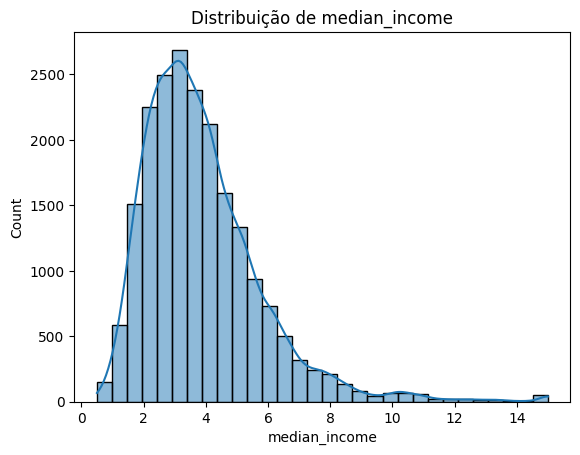

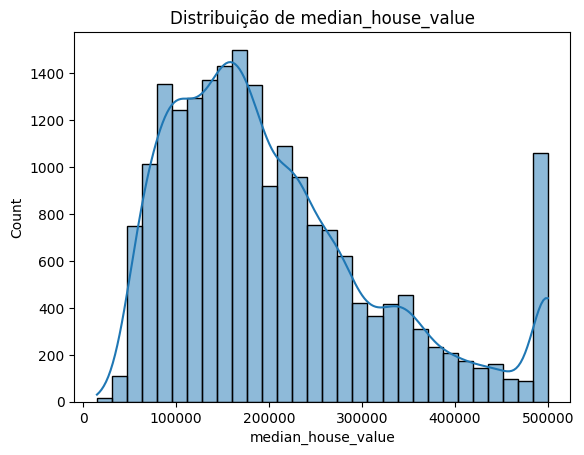

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de median_income
sns.histplot(housing_data['median_income'], bins=30, kde=True)
plt.title('Distribuição de median_income')
plt.show()

# Distribuição de median_house_value
sns.histplot(housing_data['median_house_value'], bins=30, kde=True)
plt.title('Distribuição de median_house_value')
plt.show()


# 3. Pré-processamento dos Dados #

*  Selecionar variáveis relevantes:

In [9]:
features = housing_data[['longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value']]


*  Remover valores ausentes (se necessário):

In [10]:
features = features.dropna()


*  Escalar as variáveis numéricas:

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# 4. Determinar o Número Ideal de Clusters (Método do Cotovelo) #



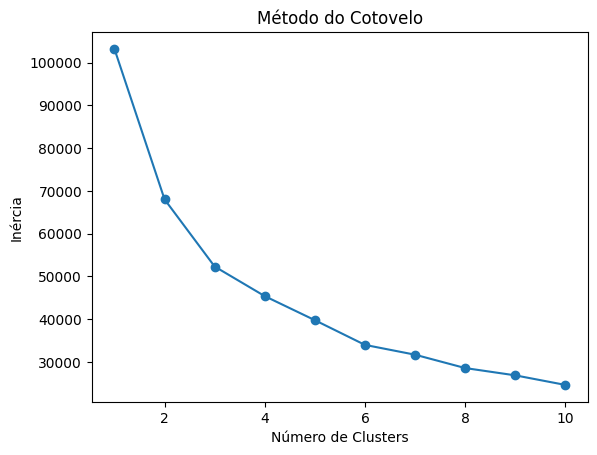

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Testar diferentes números de clusters (K)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.plot(K, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


# 5. Aplicar K-means #

*  Escolha o número ideal de clusters (ex.: K=4) e aplique o modelo:

In [13]:
# Aplicar o K-means com o número ideal de clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adicionar os clusters ao dataset original
housing_data['Cluster'] = clusters


# 6. Visualizar os Clusters #

*  Clusters no mapa geográfico (longitude vs. latitude):

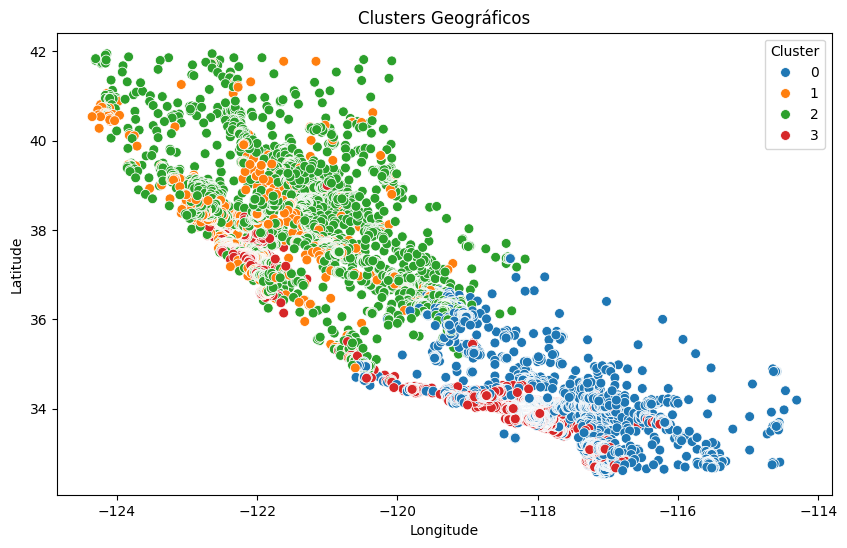

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='longitude', y='latitude', hue='Cluster', palette='tab10', s=50)
plt.title('Clusters Geográficos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


*  Características de cada cluster:

In [15]:
cluster_summary = housing_data.groupby('Cluster')[['housing_median_age', 'median_income', 'median_house_value']].mean()
print(cluster_summary)


         housing_median_age  median_income  median_house_value
Cluster                                                       
0                 28.996201       3.282841       172752.115859
1                 41.757832       3.391720       206292.064070
2                 18.638733       3.476211       151963.787161
3                 27.485897       6.926034       401619.736736


# 7. Interpretar os Resultados #

##  Com base no agrupamento e nas características médias por cluster: ##

*  Identifique grupos (ex.: "Áreas de alta renda", "Regiões mais antigas").
*  Relacione os padrões com variáveis como localização e renda.